In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajiv84ia","key":"7aedcb89b9a50144509d8adaf345de9f"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [ ]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          91446       1014  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          11983        267  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24            207         26  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

100% 610M/612M [00:10<00:00, 61.1MB/s]
100% 612M/612M [00:10<00:00, 61.2MB/s]
/content


In [ ]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

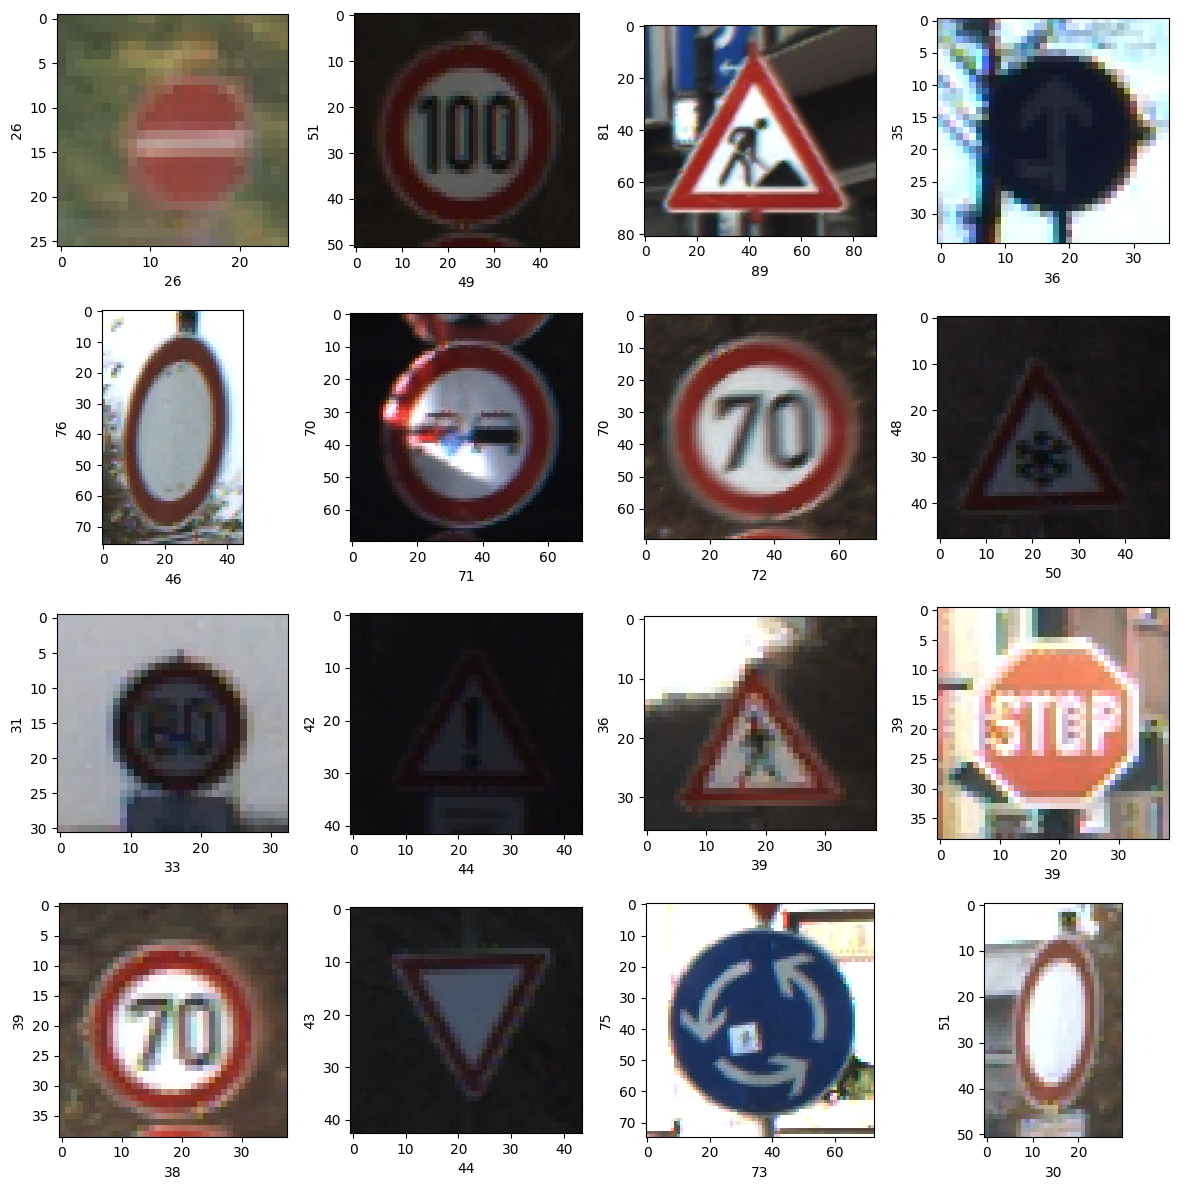

In [ ]:
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [ ]:
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [ ]:
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)
print(label_id)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
images = np.array(images)
images = images/255

In [ ]:
label_id = np.array(label_id)
label_id.shape


(39209,)

In [ ]:
images.shape

(39209, 50, 50, 3)

In [ ]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [ ]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/10
246/246 [==============================] - 227s 917ms/step - loss: 2.5896 - accuracy: 0.2877 - val_loss: 1.3647 - val_accuracy: 0.6256
Epoch 2/10
246/246 [==============================] - 211s 857ms/step - loss: 1.2610 - accuracy: 0.6048 - val_loss: 0.5294 - val_accuracy: 0.8764
Epoch 3/10
246/246 [==============================] - 212s 861ms/step - loss: 0.8234 - accuracy: 0.7355 - val_loss: 0.3398 - val_accuracy: 0.9441
Epoch 4/10
246/246 [==============================] - 223s 906ms/step - loss: 0.6342 - accuracy: 0.7937 - val_loss: 0.2086 - val_accuracy: 0.9631
Epoch 5/10
246/246 [==============================] - 215s 873ms/step - loss: 0.5354 - accuracy: 0.8263 - val_loss: 0.1512 - val_accuracy: 0.9745
Epoch 6/10
246/246 [==============================] - 220s 894ms/step - loss: 0.4636 - accuracy: 0.8477 - val_loss: 0.1286 - val_accuracy: 0.9765
Epoch 7/10
246/246 [==============================] - 217s 881ms/step - loss: 0.4170 - accuracy: 0.8630 - val_loss: 0.1094 -

<Axes: >

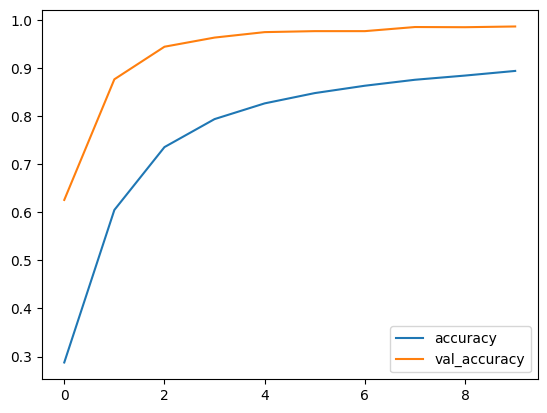

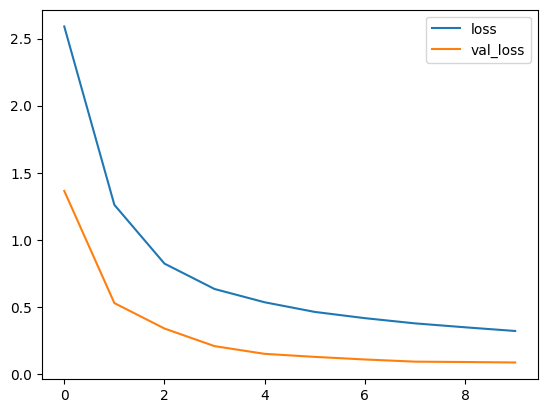

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
model.save('traffic_sign.h5')

In [ ]:
all_labels = {
    0:'Speed limit (20km/h)', 1:'Speed limit (30km/h)', 2:'Speed limit (50km/h)',3: 'Speed limit (60km/h)',
    4:'Speed limit (70km/h)',5: 'Speed limit (80km/h)', 6:'End of speed limit (80km/h)',7: 'Speed limit (100km/h)',
    8:'Speed limit (120km/h)', 9:'No passing', 10:'No passing for vehicles over 3.5 metric tons',
    11:'Right-of-way at the next intersection', 12:'Priority road', 13:'Yield', 14:'Stop', 15:'No vehicles',
    16:'Vehicles over 3.5 metric tons prohibited', 17:'No entry', 18:'General caution', 19:'Dangerous curve to the left',
    20:'Dangerous curve to the right', 21:'Double curve', 22:'Bumpy road', 23:'Slippery road', 24:'Road narrows on the right',
    25:'Road work', 26:'Traffic signals', 27:'Pedestrians', 28:'Children crossing', 29:'Bicycles crossing', 30:'Beware of ice/snow',
    31:'Wild animals crossing', 32:'End of all speed and passing limits', 33:'Turn right ahead', 34:'Turn left ahead',
    35:'Ahead only', 36:'Go straight or right', 37:'Go straight or left', 38:'Keep right', 39:'Keep left', 40:'Roundabout mandatory',
    41:'End of no passing', 42:'End of no passing by vehicles over 3.5 metric'
}

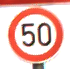

In [ ]:
# Visualize test image
input_image = Image.open('traffic_sign_dataset/Test/00316.png')
input_image

In [ ]:
input_image = input_image.resize((50, 50))  # Resize to match the model's input size
input_image = np.array(input_image) / 255.0    # Normalize pixel values (assuming 0-255 scale)
input_image = np.expand_dims(input_image, axis=0)
input_image

array([[[[0.71764706, 0.15686275, 0.10980392],
         [0.72156863, 0.15686275, 0.10980392],
         [0.7254902 , 0.16470588, 0.11372549],
         ...,
         [0.83529412, 0.27058824, 0.20392157],
         [0.86666667, 0.2627451 , 0.19607843],
         [0.87058824, 0.27843137, 0.19607843]],

        [[0.70980392, 0.14901961, 0.11372549],
         [0.71764706, 0.14901961, 0.10980392],
         [0.72941176, 0.15686275, 0.11764706],
         ...,
         [0.87058824, 0.48627451, 0.44705882],
         [0.91764706, 0.52941176, 0.48235294],
         [0.91764706, 0.56862745, 0.50980392]],

        [[0.67843137, 0.16862745, 0.14117647],
         [0.70588235, 0.15686275, 0.12941176],
         [0.7254902 , 0.16078431, 0.14117647],
         ...,
         [0.98039216, 0.74901961, 0.77647059],
         [0.99215686, 0.78431373, 0.79607843],
         [0.98039216, 0.79215686, 0.81568627]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [ ]:
predictions = model.predict(input_image)


1/1 [==============================] - 0s 49ms/step


In [ ]:
predicted_label = np.argmax(predictions, axis=1)


In [ ]:
predicted_label = all_labels[predicted_label[0]]


In [ ]:

print(f'Predicted Label: {predicted_label}')

Predicted Label: Speed limit (50km/h)
